# Introduction to probability distributions

In [32]:
import numpy as np
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6,4)

## Examples of distributions

### Uniform distribution

In [2]:
samples = np.random.random(size=100000)

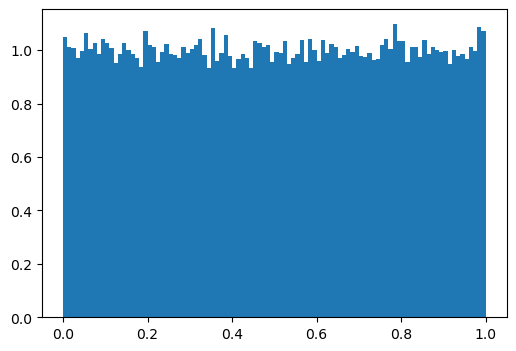

In [3]:
plt.hist(samples, density=True, bins=100);

### Bernoulli distribution

In [4]:
def bernoulli(p):
    return int(np.random.random() < p)

In [5]:
samples = [bernoulli(.6) for _ in range(1000)]

In [6]:
np.mean(samples)

0.577

In [7]:
def bernoulli(p):
    return int(np.random.random() <= p)

In [8]:
np.mean([bernoulli(.7) for _ in range(1000)])

0.691

### Binomial distribution

In [9]:
p = 0.7
n = 10
np.sum([bernoulli(p) for _ in range(n)])

5

In [10]:
samples = np.random.binomial(n=n, p=p, size=100000)

In [11]:
n*p, np.sqrt(n*p*(1-p))

(7.0, 1.449137674618944)

In [12]:
samples.mean(), samples.std()

(7.00131, 1.4464951724426878)

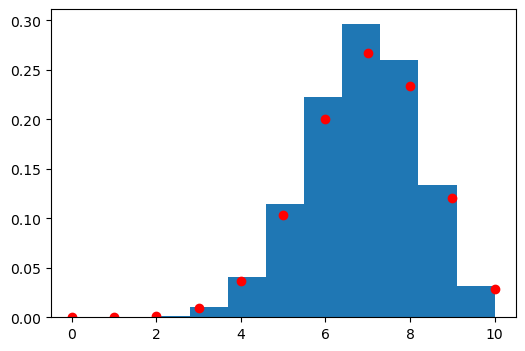

In [13]:
plt.hist(samples, density=True, bins=10);
x = np.arange(0, 11)
y = stats.binom.pmf(x, n=10, p=.7)
plt.scatter(x, y, color="red");

### Normal distribution

In [14]:
mu = 10     # Mean
sigma = 5   # Standard deviation

In [15]:
samples = np.random.normal(loc=mu, scale=sigma, size=10000)

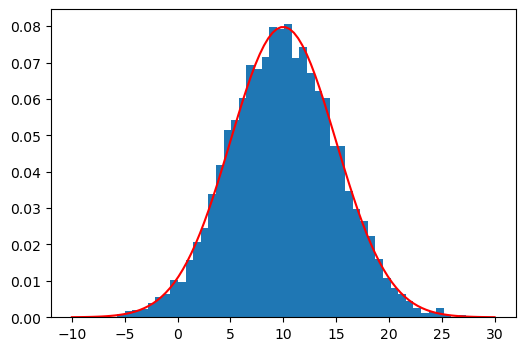

In [16]:
plt.hist(samples, density=True, bins=50);

x = np.linspace(-10, 30, 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, color="red");

## Central limit theorem

For identically distributed independent samples, the standardized sample mean tends towards the standard normal distribution as the number of sample grows (even if the original variables themselves are not normally distributed).

In [214]:
samples = np.random.binomial(n=10, p=.7, size=100)

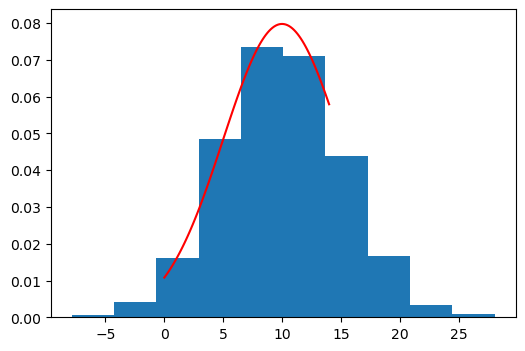

In [17]:
plt.hist(samples, density=True);
x = np.arange(0, 10)
y = stats.binom.pmf(x, n=10, p=.7)

x = np.linspace(0, 14, 100)
y = stats.norm.pdf(x, 10, 5)
plt.plot(x, y, color="red");

In [18]:
n = 10
p = .7
N = 100
means_samples = [np.random.binomial(n=n, p=p, size=N).mean() for _ in range(10000)]

mu = n*p
var = n*p*(1-p)
sigma = np.sqrt(var / N)

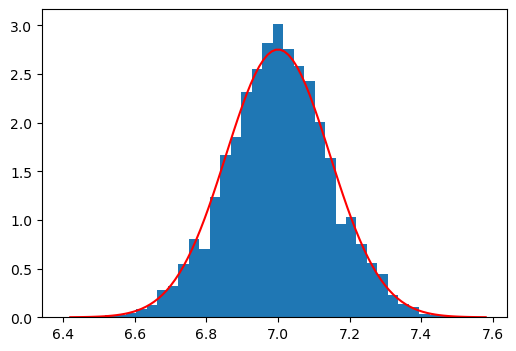

In [19]:
plt.hist(means_samples, bins=40, density=True);

x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, color="red");

### Even with a _really_ non-normal distibution

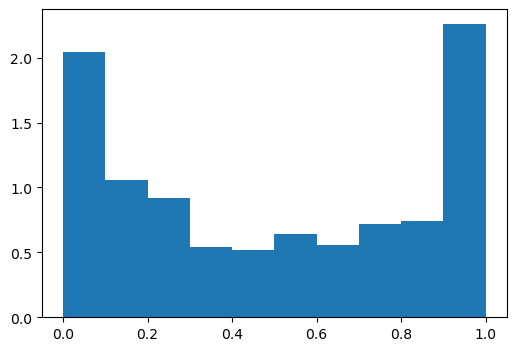

In [20]:
samples = np.random.beta(a=.5, b=.5, size=500)
plt.hist(samples, density=True);

In [21]:
a = .5
b = .5
N = 100
means_samples = [np.random.beta(a, b, size=N).mean() for _ in range(1000)]

mu = a / (a + b)
var = a * b / ((a + b)**2 * (a + b + 1))
sigma = np.sqrt(var / N)

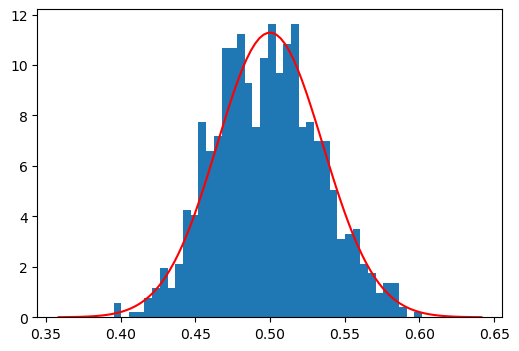

In [22]:
plt.hist(means_samples, density=True, bins=40);

x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, color="red");

# Hypothesis testing

## p-values

### One sample t-test

In [ ]:
#the distribution is symetrique, so the value of the histogramme is equale on the both side.

In [23]:
mean = 10
stdev = 5
samples = np.random.normal(mean, stdev, 1000)

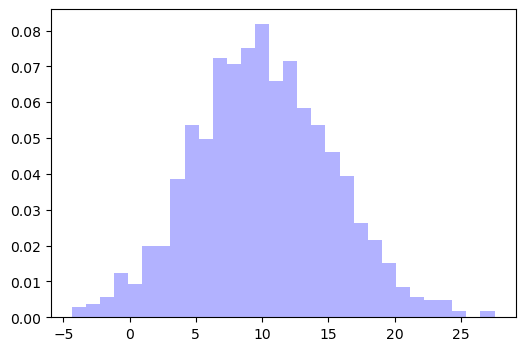

In [24]:
plt.hist(samples, alpha=.3, color='blue', bins=30, density=True);

In [25]:
stats.ttest_1samp(samples, popmean=12).pvalue

1.6318364296039801e-28

### Two samples (aka paired) t-test

In [26]:
mean_1 = 10
stdev_1 = 5

mean_2 = 12
stdev_2 = 6

In [27]:
samples_1 = np.random.normal(mean_1, stdev_1, 1000)
samples_2 = np.random.normal(mean_2, stdev_2, 1000)

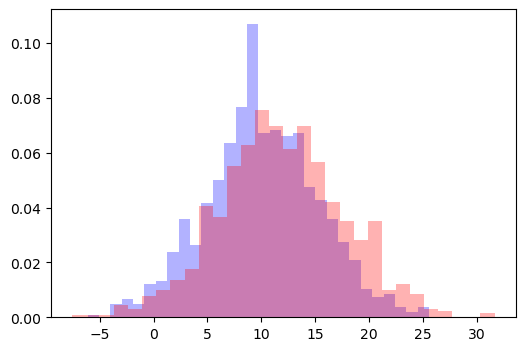

In [28]:
plt.hist(samples_1, alpha=.3, color='blue', bins=30, density=True);
plt.hist(samples_2, alpha=.3, color='red', bins=30, density=True);

In [29]:
stats.ttest_ind(samples_1, samples_2).pvalue

7.824640358856152e-14

### Chi-squared independance test

Null hypothesis: the two variables are independant

In [30]:
samples_1 = np.random.choice(['M', 'F'], 90)
samples_2 = np.random.choice(['A', 'B', 'C'], 90)

In [49]:
pd.DataFrame({'result1': samples_1, 'result2': samples_2})

,result1,result2
0,F,B
1,F,C
2,M,C
3,M,C
4,M,C
...,...,...
125,F,C
126,F,C
127,F,C
128,F,C


In [34]:
crosstab = stats.contingency.crosstab(samples_1, samples_2)
crosstab.count

array([[12, 17, 12],
       [20, 11, 18]])

In [35]:
stats.chi2_contingency(crosstab.count).pvalue

0.1492201776349861

pvalue > 0.05, so we cannot reject the null hypothesis (that variables are independant) : so we may say the variables are indeed independant.

In [36]:
samples_1 = np.concatenate([np.random.choice(['M', 'F'], 90), ["F"]*40])
samples_2 = np.concatenate([np.random.choice(['A', 'B', 'C'], 90), ["C"]*40])

In [50]:
pd.DataFrame({'result1': samples_1, 'result2': samples_2})

,result1,result2
0,F,B
1,F,C
2,M,C
3,M,C
4,M,C
...,...,...
125,F,C
126,F,C
127,F,C
128,F,C


In [446]:
crosstab = stats.contingency.crosstab(samples_1, samples_2)
crosstab.count

array([[13, 10, 55],
       [13, 17, 22]])

In [447]:
stats.chi2_contingency(crosstab.count).pvalue

0.0036869558119728605

pvalue < 0.05, so we can reject the null hypothesis (that variables are independant) : so we can say the variables are dependant.

## Confidence interval

A 0.95 confidence interval is the range of values of the variable for which the p-value is smaller than 0.05.